<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-dependency" data-toc-modified-id="Import-dependency-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import dependency</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Generalized-Additive-Logistic-Regression" data-toc-modified-id="Generalized-Additive-Logistic-Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Generalized Additive Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#pygam" data-toc-modified-id="pygam-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>pygam</a></span><ul class="toc-item"><li><span><a href="#Model-fitting-and-summary" data-toc-modified-id="Model-fitting-and-summary-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Model fitting and summary</a></span></li><li><span><a href="#Partial-dependency-plot" data-toc-modified-id="Partial-dependency-plot-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Partial dependency plot</a></span></li></ul></li><li><span><a href="#statsmodels" data-toc-modified-id="statsmodels-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>statsmodels</a></span><ul class="toc-item"><li><span><a href="#Model-fitting-and-summary" data-toc-modified-id="Model-fitting-and-summary-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Model fitting and summary</a></span></li><li><span><a href="#Partial-dependency-plots" data-toc-modified-id="Partial-dependency-plots-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Partial dependency plots</a></span></li></ul></li></ul></li></ul></div>

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

# Import dependency

In [16]:
from matplotlib import transforms, pyplot as plt
import numpy as np
import pandas as pd
from pygam import LogisticGAM
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import statsmodels.api as sm

In [7]:
%matplotlib inline

# Load data

In [8]:
df = pd.read_csv("../data/Spam.txt")
df.head()

,test,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,1,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [87]:
# PAGE 301. We coded spam as 1 and email as zero. A test set of size 1536 was
#           randomly chosen, leaving 3065 observations in the training set.
target = 'spam'
columns = ['word_freq_make', 'word_freq_address', 'word_freq_all',
           'word_freq_3d', 'word_freq_our', 'word_freq_over',
           'word_freq_remove', 'word_freq_internet', 'word_freq_order',
           'word_freq_mail', 'word_freq_receive', 'word_freq_will',
           'word_freq_people', 'word_freq_report', 'word_freq_addresses',
           'word_freq_free', 'word_freq_business', 'word_freq_email',
           'word_freq_you', 'word_freq_credit', 'word_freq_your',
           'word_freq_font', 'word_freq_000', 'word_freq_money',
           'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
           'word_freq_650', 'word_freq_lab', 'word_freq_labs',
           'word_freq_telnet', 'word_freq_857', 'word_freq_data',
           'word_freq_415', 'word_freq_85', 'word_freq_technology',
           'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
           'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
           'word_freq_original', 'word_freq_project', 'word_freq_re',
           'word_freq_edu', 'word_freq_table', 'word_freq_conference',
           'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
           'char_freq_$', 'char_freq_#', 'capital_run_length_average',
           'capital_run_length_longest', 'capital_run_length_total']
# let's give columns more compact names
features = ['make', 'address', 'all', '3d', 'our', 'over', 'remove',
            'internet', 'order', 'mail', 'receive', 'will', 'people',
            'report', 'addresses', 'free', 'business', 'email', 'you',
            'credit', 'your', 'font', '000', 'money', 'hp', 'hpl',
            'george', '650', 'lab', 'labs', 'telnet', '857', 'data',
            '415', '85', 'technology', '1999', 'parts', 'pm', 'direct',
            'cs', 'meeting', 'original', 'project', 're', 'edu', 'table',
            'conference', 'ch_;', 'ch(', 'ch[', 'ch!', 'ch$', 'ch#',
            'CAPAVE', 'CAPMAX', 'CAPTOT']

X, y = df[columns].values, df[target].values

# split by test column value
is_test = df.test.values
X_train, X_test = X[is_test == 0], X[is_test == 1]
y_train, y_test = y[is_test == 0], y[is_test == 1]

# Generalized Additive Logistic Regression

In [27]:
# we will calculate train and test error rates for all models
def error_rate(y_true, y_pred):
    return 1 - accuracy_score(y_true, y_pred)

In [28]:
# PAGE 301. A generalized additive model was fit, using a cubic smoothing
#           spline with a nominal four degrees of freedom for each predictor.
# NOTE. With this lambda values we get about 4 df for predictors.
lam = np.array([1.00e+06, 5.00e+02, 5.00e+02, 1.00e-01, 5.00e+03,  # 1-5
                1.64e+02, 4.16e+01, 4.00e+01, 8.00e+01, 1.64e+02,  # 6-10
                1.64e+02, 3.28e+02, 1.64e+02, 8.26e+01, 4.16e+01,  # 11-15
                1.64e+02, 8.26e+01, 1.64e+02, 3.28e+02, 4.16e+01,  # 16-20
                3.28e+02, 1.09e+01, 2.11e+01, 4.16e+01, 2.11e+01,  # 21-25
                1.09e+01, 7.00e-01, 1.09e+01, 7.00e-01, 1.09e+01,  # 26-30
                3.25e+00, 7.00e-01, 2.11e+01, 1.00e-01, 5.81e+00,  # 31-35
                4.16e+01, 8.26e+01, 1.97e+00, 1.09e+01, 8.26e+01,  # 36-40
                1.00e-02, 8.50e-01, 1.00e+00, 5.81e+00, 8.26e+01,  # 41-45
                1.09e+01, 1.00e+00, 1.00e+00, 8.26e+01, 8.26e+01,  # 46-50
                2.11e+01, 1.64e+02, 1.00e+00, 1.00e-01, 1.00e+01,  # 51-55
                1.00e-02, 1.00e-02])                               # 56-57

## pygam
- I used the pyGAM library for additive logistic regression. The result is close to the result from the book. But, unfortunately, I could not perform the predictors significance analysis, i.e. restore TABLE 9.2. Partial dependence plots look a little different. This is probably due to the fact that pyGAM uses B-splines, while the book uses natural cubic splines. It is also difficult to get 4 degrees of freedom for predictors, because you can only manipulate lambda. Perhaps in the future I will try to implement a simple version of GAM on my own.

### Model fitting and summary

In [19]:
# PAGE 301. Most of the spam predictors have a very long-tailed distribution.
#           Before fitting the GAM model, we log-transformed each variable
#           (actually log(x+0.1)), but the plots in Figure 9.1 are shown as a
#           function of the original variables.
offset = 0.1
X_train_log = np.log(X_train+offset)
X_test_log = np.log(X_test+offset)
gam_clf = LogisticGAM(lam=lam).fit(X_train_log, y_train) # default fit intercept

/Users/karlzhang/miniforge3/envs/DT/lib/python3.11/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in divide
  return dist.levels / (mu * (dist.levels - mu))
/Users/karlzhang/miniforge3/envs/DT/lib/python3.11/site-packages/pygam/pygam.py:627: RuntimeWarning: invalid value encountered in multiply
  self.link.gradient(mu, self.distribution) ** 2


In [13]:
# PAGE 301. TABLE 9.1. Test data confusion matrix for the additive logistic
#           regression model fit to the spam training data. The overall test
#           error rate is 5.5%.
y_test_hat = gam_clf.predict(X_test_log)
cm = 100*confusion_matrix(y_test, y_test_hat)/y_test.shape[0]
print(f'           |   Predicted Class  ')
print(f'           |----------------------')
print(f'True Class | email (0)  spam (1)')
print(f'----------------------------------')
print(f'email (0)  |     {cm[0,0]:.1f}%     {cm[0,1]:.1f}%')
print(f'spam (1)   |      {cm[1,0]:.1f}%    {cm[1,1]:.1f}%')
gam_error_rate = error_rate(y_test, y_test_hat)
print(f'\nGAM Test Error Rate: {gam_error_rate*100:.1f}%')

           |   Predicted Class  
           |----------------------
True Class | email (0)  spam (1)
----------------------------------
email (0)  |     58.6%     2.7%
spam (1)   |      2.6%    36.1%

GAM Test Error Rate: 5.3%


- Predictors Significance Table
    - NOTE. This is not the TABLE 9.2. Nearly all values are from linear logistic regression model. Only df are taken from GAM. It is interesting to note that some features with low Nonlinear P-values (see the book) have high P-values in linear logistic model.

In [17]:
# refit linear logistic model to log-transformed features
lr_clf = sm.Logit(y_train, sm.add_constant(X_train_log)).fit(disp=False)
# calculate z-values for the linear logistic model
cov = lr_clf.cov_params()
std_err = np.sqrt(np.diag(cov))
z_values = lr_clf.params / std_err

# PAGE 302. TABLE 9.2. Significant predictors from the additive model fit to
#           the spam training data.
print('Name      Num.   df  Coefficient  Std. Error  Z Score  P-value')
print('-----------------------------------------------------------------')
print('                       Positive effects')
for p in ['our', 'over', 'remove', 'internet', 'free', 'business', 'hpl',
          'ch!', 'ch$', 'CAPMAX', 'CAPTOT', 'hp', 'george', '1999', 're',
          'edu']:
    if p == 'hp':
        print('                       Negative effects')
    idx = features.index(p)
    coef_indices = gam_clf.terms.get_coef_indices(idx)
    edof = gam_clf.statistics_['edof_per_coef'][coef_indices].sum()
    cf = lr_clf.params[idx+1]
    print(f'{p:<10}{idx+1:>3}{edof:>6.1f}{cf:>10.3f}{std_err[idx+1]:>13.3f}'
          f'{z_values[idx+1]:>10.3f}{lr_clf.pvalues[idx+1]:>9.3f}')

Name      Num.   df  Coefficient  Std. Error  Z Score  P-value
-----------------------------------------------------------------
                       Positive effects
our         5   4.1     0.444        0.091     4.899    0.000
over        6   3.9     0.198        0.159     1.246    0.213
remove      7   3.7     0.950        0.161     5.908    0.000
internet    8   3.8     0.424        0.150     2.835    0.005
free       16   3.2     0.506        0.098     5.174    0.000
business   17   3.0     0.604        0.153     3.939    0.000
hpl        26   2.3     0.027        0.202     0.135    0.892
ch!        52   1.5     0.754        0.102     7.372    0.000
ch$        53   1.4     1.421        0.227     6.261    0.000
CAPMAX     56   2.5     0.056        0.187     0.298    0.766
CAPTOT     57   3.4     0.572        0.138     4.149    0.000
                       Negative effects
hp         25   3.0    -1.348        0.195    -6.898    0.000
george     27   2.2    -3.966        0.707    -

### Partial dependency plot

In [116]:
ORANGE, BLUE, PURPLE = '#FF8C00', '#0000FF', '#A020F0'
GRAY1, GRAY4, GRAY7 = '#231F20', '#646369', '#929497'

def inverse_trfm(arr):
    return np.exp(arr)-offset

# plots a partial dependance plot for the idx-th feature
def dependance_plot(ax, idx, ylim):
    X_grid = gam_clf.generate_X_grid(term=idx)
    pdep, confi = gam_clf.partial_dependence(term=idx, X=X_grid, width=0.95)
    ax.plot(inverse_trfm(X_grid[:, idx]), pdep, color='#56B4E9', linewidth=0.9)
    
    # plot shaded region
    ax.fill_between(
        inverse_trfm(X_grid[:, idx]),
        confi[:, 0],
        confi[:, 1],
        color='#FFEC8B'
    )
    
    for e in ax.get_yticklabels() + ax.get_xticklabels():
        e.set_fontsize(4)
        
    ax.set_ylabel(f'f({features[idx]})', color=GRAY4, fontsize=6)
    ax.set_xlabel(f'{features[idx]}', color=GRAY4, fontsize=6)
    ax.set_ylim(ylim)
    
    y_from, y_to = ylim
    jitter_strength = (X_train[:, idx].max()-X_train[:, idx].min())*0.01
    ax.scatter(
        X_train[:, idx]+np.random.randn(X_train.shape[0]) * jitter_strength,
        np.ones_like(X_train[:, idx])*(y_from+(y_to-y_from)*0.02),
        marker = '|',
        color = 'red',
        linewidth=0.5
    )
    
    ax.yaxis.set_label_coords(-0.2, 0.5)
    ax.xaxis.set_label_coords(0.5, -0.15)

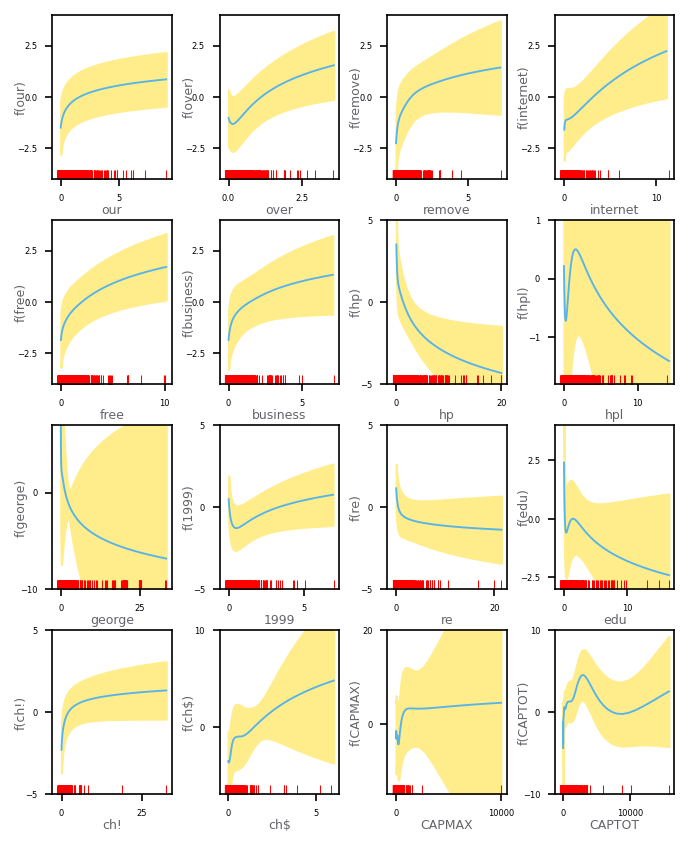

In [117]:
# PAGE 303. FIGURE 9.1. Spam analysis: estimated functions for significant
#           predictors. The rug plot along the bottom of each frame indicates
#           the observed values of the corresponding predictor. For many of the
#           predictors the nonlinearity picks up the discontinuity at zero.
fig, axarr = plt.subplots(4, 4, figsize=(5.355, 6.75), dpi=150)
plt.subplots_adjust(wspace=0.4, hspace=0.25)

# feature indices with y-lims
plots = [[(4, (-4, 4)),   (5, (-4, 4)),   (6, (-4, 4)),    (7, (-4, 4))],
         [(15, (-4, 4)),  (16, (-4, 4)),  (24, (-5, 5)),   (25, (-1.8, 1))],
         [(26, (-10, 7)), (36, (-5, 5)),  (44, (-5, 5)),   (45, (-3, 4))],
         [(51, (-5, 5)),  (52, (-7, 10)), (55, (-15, 20)), (56, (-10, 10))]]
for i in range(4):
    for j in range(4):
        dependance_plot(axarr[i, j], *plots[i][j])

## statsmodels
- [ref](https://www.statsmodels.org/dev/gam.html)

### Model fitting and summary

In [80]:
from statsmodels.gam.smooth_basis import BSplines
from statsmodels.gam.generalized_additive_model import GLMGam, LogitGam

In [93]:
# PAGE 301. A generalized additive model was fit, using a cubic smoothing
#           spline with a nominal four degrees of freedom for each predictor.
# NOTE. With this lambda values we get about 4 df for predictors.
df_X_train_log = pd.DataFrame(X_train_log, columns=features)
bs = BSplines(
    df_X_train_log, df=[4]*len(features), degree=[3]*len(features), # degree=3 is cubic spline
    include_intercept=False, 
#     knot_kwds=[{'spacing': 'quantile'} for _ in range(len(features))]
)
df_y_train = pd.DataFrame(y_train.reshape((-1,1)), columns=['spam'])
gam_bs = GLMGam.from_formula(
    'spam ~ 1', 
    data=df_y_train,
    smoother=bs,
    alpha=lam,
    family=sm.families.Binomial()
)
res_bs = gam_bs.fit()
print(res_bs.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   spam   No. Observations:                 3065
Model:                         GLMGam   Df Residuals:                  2999.82
Model Family:                Binomial   Df Model:                        64.18
Link Function:                  Logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -437.94
Date:                Fri, 08 Mar 2024   Deviance:                       875.88
Time:                        06:20:03   Pearson chi2:                 1.69e+04
No. Iterations:                    14   Pseudo R-squ. (CS):             0.6529
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.5791      0.971     -3.685

In [143]:
bs.transform(X_test_log)

NotImplementedError: some data points fall outside the outermost knots, and I'm not sure how to handle them. (Patches accepted!)

In [139]:
significant_pos_features = [
    'our', 'over', 'remove', 'internet', 'free', 'business', 'hpl',
    'ch!', 'ch$', 'CAPMAX', 'CAPTOT'
]
significant_neg_features = [
    'hp', 'george', '1999', 're', 'edu' 
]
significant_features = significant_pos_features+significant_neg_features
significant_features_idx = [features.index(fname) for fname in significant_features]

In [140]:
df_X_train_log_1 = pd.DataFrame(X_train_log[:, significant_features_idx], columns=significant_features)
bs_1 = BSplines(
    df_X_train_log_1, df=[4]*len(significant_features), degree=[3]*len(significant_features), # degree=3 is cubic spline
    include_intercept=False, 
    knot_kwds=[{'spacing': 'quantile'} for _ in range(len(significant_features))]
)
df_y_train = pd.DataFrame(y_train.reshape((-1,1)), columns=['spam'])
gam_bs_1 = GLMGam.from_formula(
    'spam ~ 1', 
    data=df_y_train,
    smoother=bs_1,
    alpha=lam[significant_features_idx],
    family=sm.families.Binomial()
)
res_bs_1 = gam_bs_1.fit()
print(res_bs_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   spam   No. Observations:                 3065
Model:                         GLMGam   Df Residuals:                  3043.33
Model Family:                Binomial   Df Model:                        20.67
Link Function:                  Logit   Scale:                          1.0000
Method:                         PIRLS   Log-Likelihood:                -535.33
Date:                Fri, 08 Mar 2024   Deviance:                       1070.7
Time:                        07:08:04   Pearson chi2:                 1.56e+04
No. Iterations:                    12   Pseudo R-squ. (CS):             0.6301
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.9496      1.015     -3.889      

### Partial dependency plots

In [147]:
# plots a partial dependance plot for the idx-th feature
def sm_dependance_plot(
    sm_gam_res, ax, idx, ylim, include_constant=True, 
    features=features, X_train=X_train
):
    variable = idx
    y_est, se = sm_gam_res.partial_values(
        variable,
        include_constant=include_constant
    )
    smoother = sm_gam_res.model.smoother
    x = smoother.smoothers[variable].x
    sort_index = np.argsort(x)
    x = x[sort_index]
    y_est = y_est[sort_index]
    se = se[sort_index]

    ax.plot(inverse_trfm(x), y_est, color='#56B4E9', linewidth=0.9)

    # plot shaded region
    ax.fill_between(
        inverse_trfm(x),
        y_est - 1.96*se,
        y_est + 1.96*se,
        color='#FFEC8B'
    )

    for e in ax.get_yticklabels() + ax.get_xticklabels():
        e.set_fontsize(4)

    ax.set_ylabel(f'f({features[idx]})', color=GRAY4, fontsize=6)
    ax.set_xlabel(f'{features[idx]}', color=GRAY4, fontsize=6)

    y_from, y_to = ylim
    jitter_strength = (X_train[:, idx].max()-X_train[:, idx].min())*0.01
    ax.scatter(
        X_train[:, idx]+np.random.randn(X_train.shape[0]) * jitter_strength,
        np.ones_like(X_train[:, idx])*(y_from+(y_to-y_from)*0.02),
        marker='|',
        color='red',
        linewidth=0.5
    )
    ax.set_ylim(ylim)

    ax.yaxis.set_label_coords(-0.2, 0.5)
    ax.xaxis.set_label_coords(0.5, -0.15)

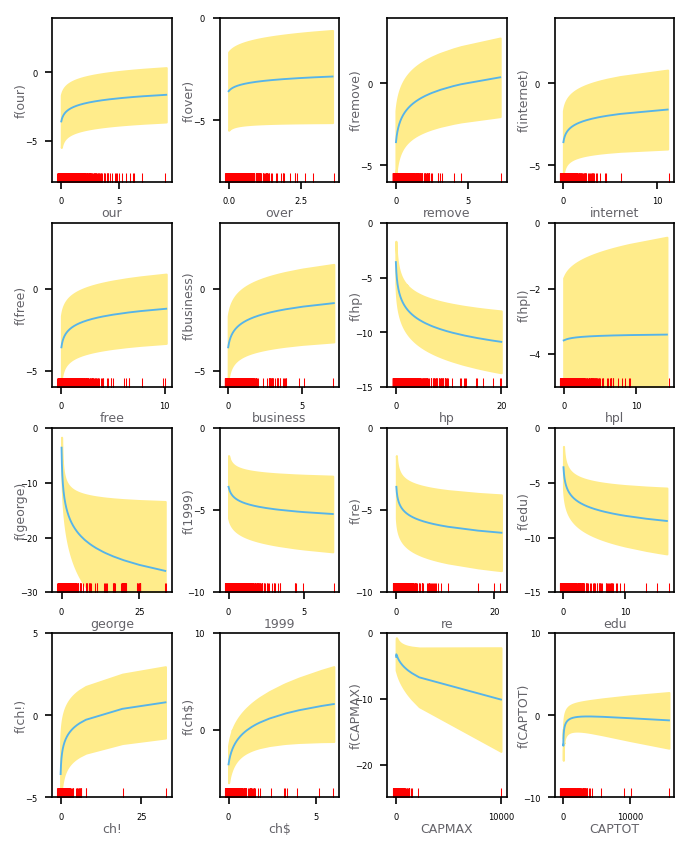

In [145]:
# PAGE 303. FIGURE 9.1. Spam analysis: estimated functions for significant
#           predictors. The rug plot along the bottom of each frame indicates
#           the observed values of the corresponding predictor. For many of the
#           predictors the nonlinearity picks up the discontinuity at zero.
fig, axarr = plt.subplots(4, 4, figsize=(5.355, 6.75), dpi=150)
plt.subplots_adjust(wspace=0.4, hspace=0.25)

# feature indices with y-lims
plots = [[(4, (-8, 4)),   (5, (-8, 0)),   (6, (-6, 4)),    (7, (-6, 4))],
         [(15, (-6, 4)),  (16, (-6, 4)),  (24, (-15, 0)),   (25, (-5, 0))],
         [(26, (-30, 0)), (36, (-10, 0)),  (44, (-10, 0)),   (45, (-15, 0))],
         [(51, (-5, 5)),  (52, (-7, 10)), (55, (-25, 0)), (56, (-10, 10))]]
for i in range(4):
    for j in range(4):
        sm_dependance_plot(res_bs, axarr[i, j], *plots[i][j], include_constant=True)

In [150]:
np.argsort(significant_features_idx)

array([ 0,  1,  2,  3,  4,  5, 11,  6, 12, 13, 14, 15,  7,  8,  9, 10])

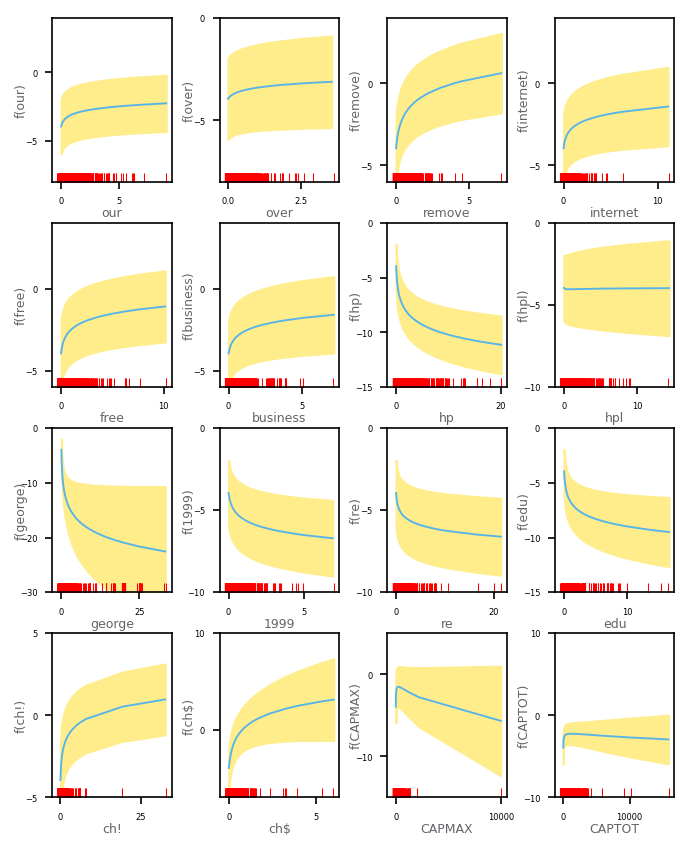

In [156]:
fig, axarr = plt.subplots(4, 4, figsize=(5.355, 6.75), dpi=150)
plt.subplots_adjust(wspace=0.4, hspace=0.25)

# feature indices with y-lims
plots = [[(0, (-8, 4)),   (1, (-8, 0)),   (2, (-6, 4)),    (3, (-6, 4))],
         [(4, (-6, 4)),  (5, (-6, 4)),  (11, (-15, 0)),   (6, (-10, 0))],
         [(12, (-30, 0)), (13, (-10, 0)),  (14, (-10, 0)),   (15, (-15, 0))],
         [(7, (-5, 5)),  (8, (-7, 10)), (9, (-15, 5)), (10, (-10, 10))]]
for i in range(4):
    for j in range(4):
        sm_dependance_plot(
            res_bs_1, axarr[i, j], *plots[i][j], 
            include_constant=True,
            features=significant_features,
            X_train=X_train[:, significant_features_idx]
        )